In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import natsort
import h5py
import seaborn

In [4]:
def get_JS_divs(root_dir, index=-1):
    files = natsort.natsorted([ f for f in os.listdir(root_dir) if "JS" in f])
    
    labels = ["m1","m2","phase","dist", "t0","theta_jn", "psi","a1","a2","theta_1","theta_2","phi_12","phi_jl","alpha","delta"]
    
    JS = {}
    epochs = []
    for fname in files:
        filename = os.path.join(root_dir,fname)

        dat_ind = int(fname.split("_")[5])
        epoch = int(fname.split("_")[3])
        epochs.append(epoch)

        with open(filename,"r") as f:
            data = np.loadtxt(f)
        JS.setdefault(dat_ind, [])
        JS[dat_ind].append(data)

    for key in JS.keys():
        JS[key] = np.array(JS[key])

    epochs = np.array(sorted(list(set(epochs))))
    
    par_vals = []
    for i in range(len(JS)):

        par_vals.append(JS[i][index])
    par_vals = np.array(par_vals)
    
    return epochs, JS, par_vals, labels

In [24]:
test_dir = "/home/joseph.bayley/public_html/CBC/O4_sampreview/pp_test_1/run8_gelu_smallbatch/JS_divergence/" 

In [25]:
test_files = natsort.natsorted(os.listdir(test_dir))

In [26]:
test_truths = []
test_snrs = []
test_waveforms = []
for t_file in test_files:
    with h5py.File(os.path.join(test_dir,t_file),"r") as h:
        test_truths.append(np.array(h["x_data"]))
        test_snrs.append(np.array(h["snrs"]))
        test_waveforms.append(np.array(h["y_data_noisy"]))

OSError: Unable to open file (file signature not found)

In [10]:
root = "/home/joseph.bayley/public_html/CBC/O4_sampreview/pp_test_1/run8_gelu_smallbatch/JS_divergence/" 
#root = "/home/joseph.bayley/public_html/CBC/highSNRtest/run1/JS_divergence/"

In [11]:
epochs, JS, par_vals, labels = get_JS_divs(root)

In [9]:
np.shape(par_vals)

(8, 15)

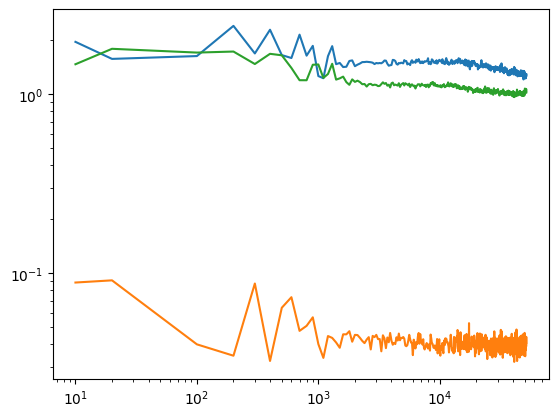

In [12]:
fig, ax = plt.subplots()
for i in range(len(JS)):
    try:
        ax.plot(epochs,np.sum(JS[i], axis=1), label=i)
    except:
        pass
ax.set_yscale("log")
ax.set_xscale("log")
#ax.legend()

In [28]:
np.shape(labels), len(JS)

((15,), 8)

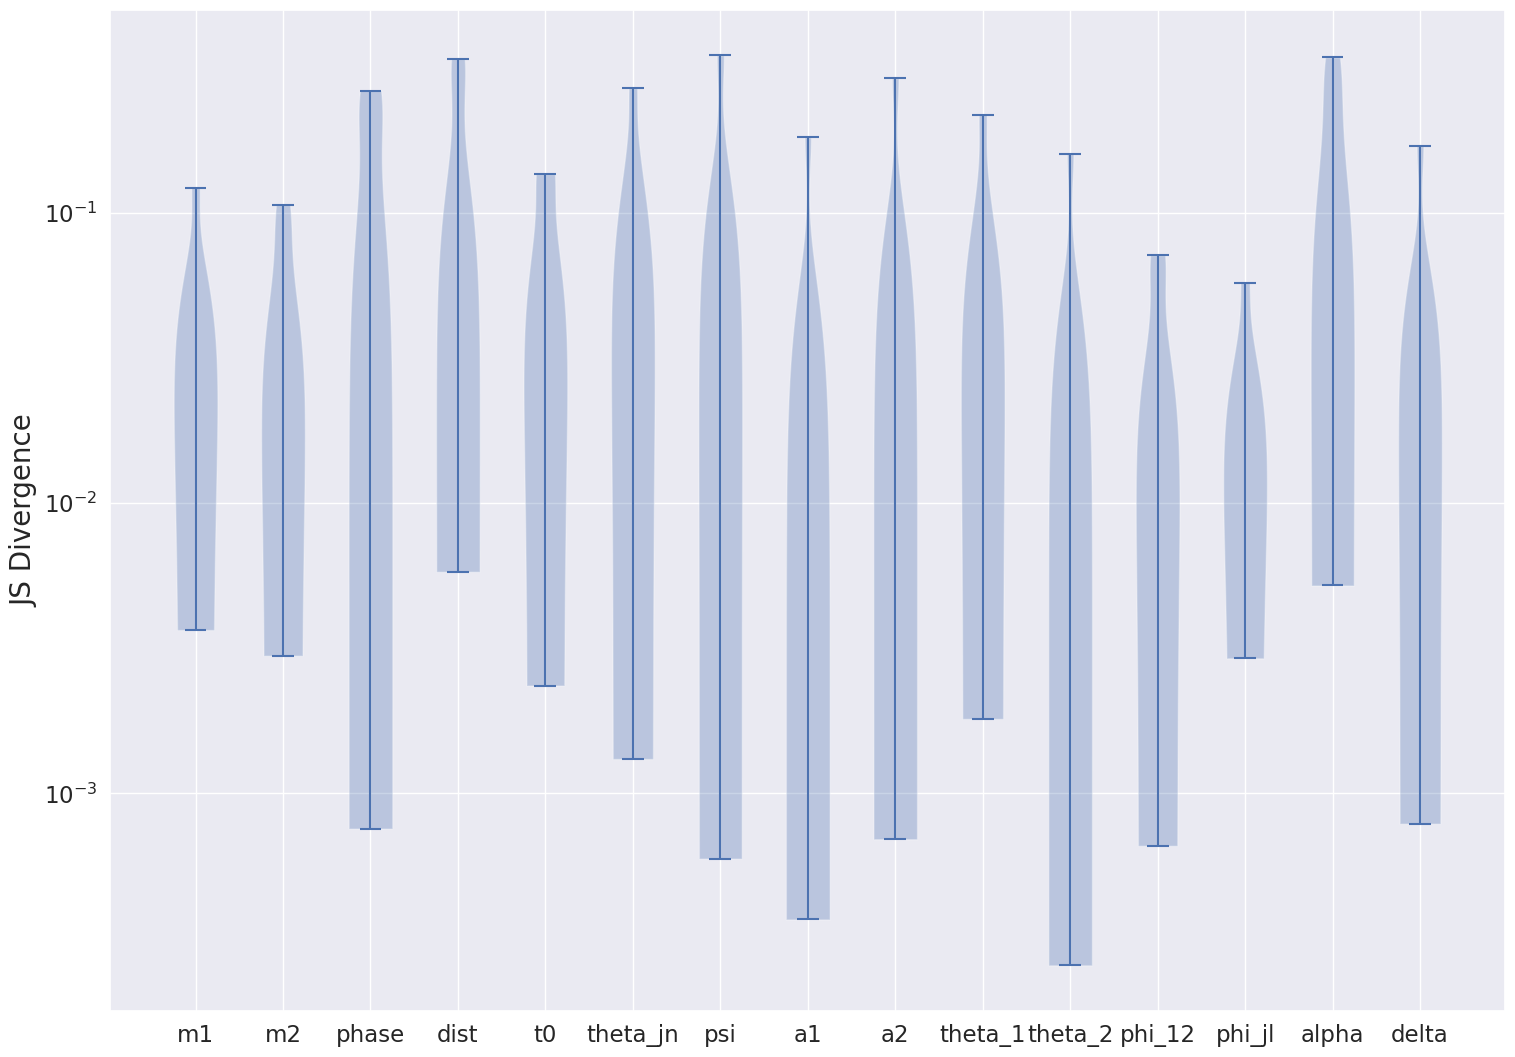

In [25]:
fig, ax = plt.subplots(figsize = (18,13))
pos = np.arange(15)
ax.violinplot(par_vals, pos)
ax.set_xticks(pos)
ax.set_xticklabels(labels)
ax.set_ylabel("JS Divergence", fontsize = 20)
ax.set_yscale("log")

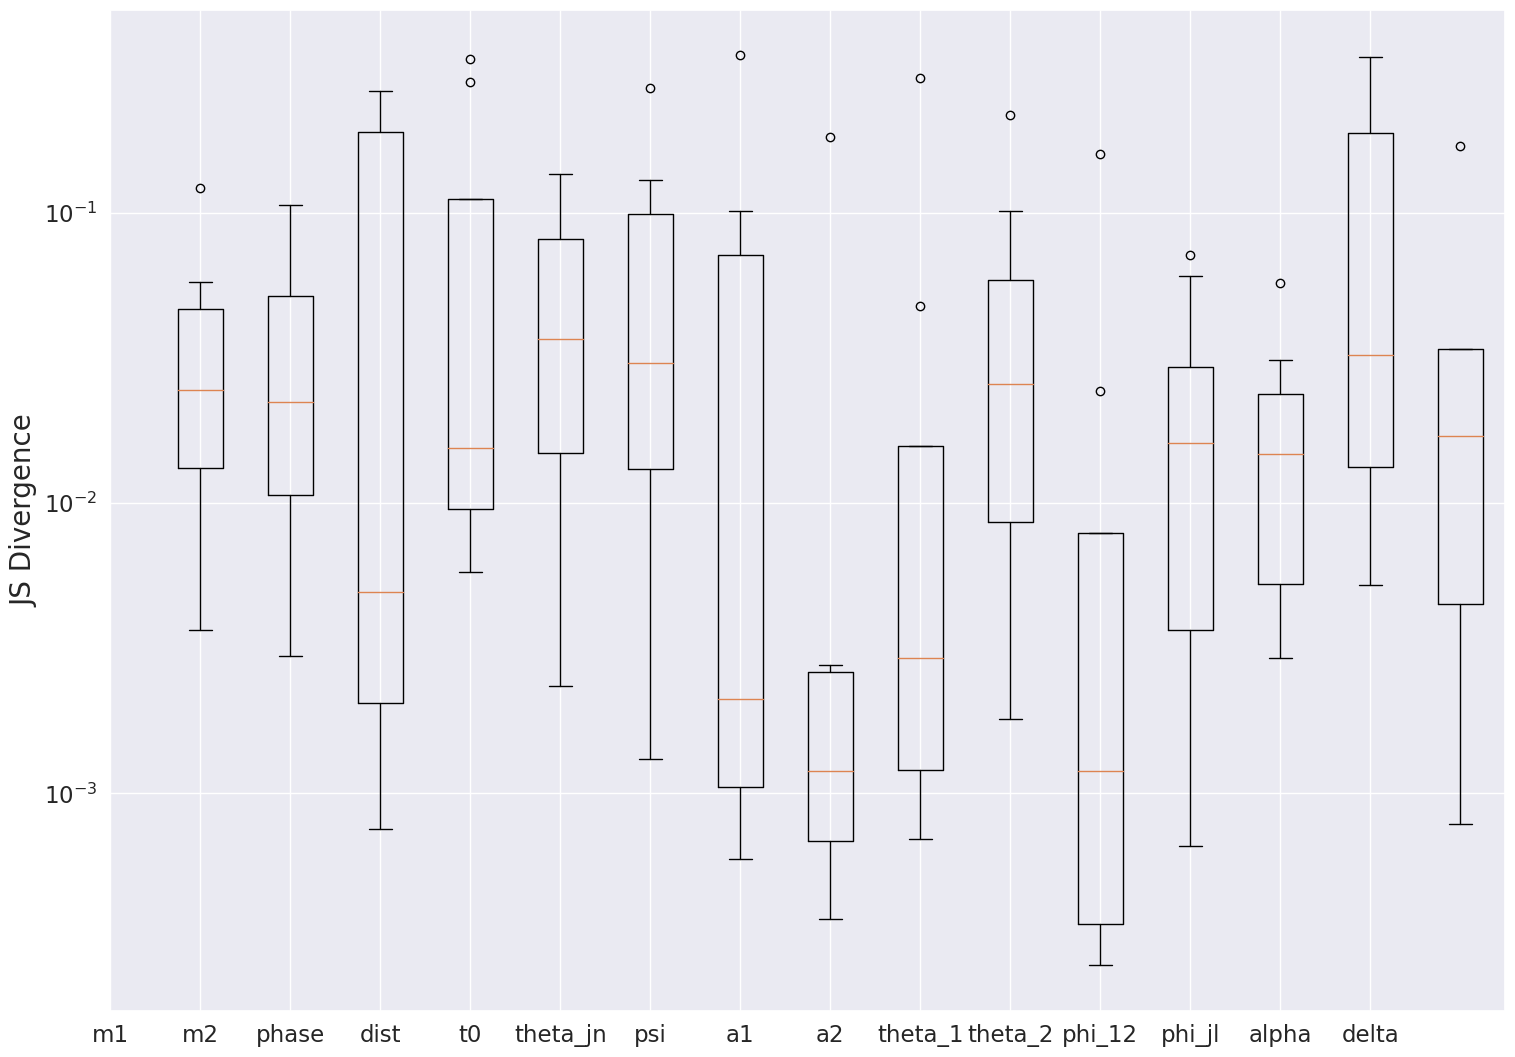

In [30]:
fig, ax = plt.subplots(figsize = (18,13))
pos = np.arange(15)
ax.boxplot(par_vals)
ax.set_xticks(pos)
ax.set_xticklabels(labels)
ax.set_ylabel("JS Divergence", fontsize = 20)
ax.set_yscale("log")

## JS grid

In [33]:
np.shape(par_vals)

(8, 15)

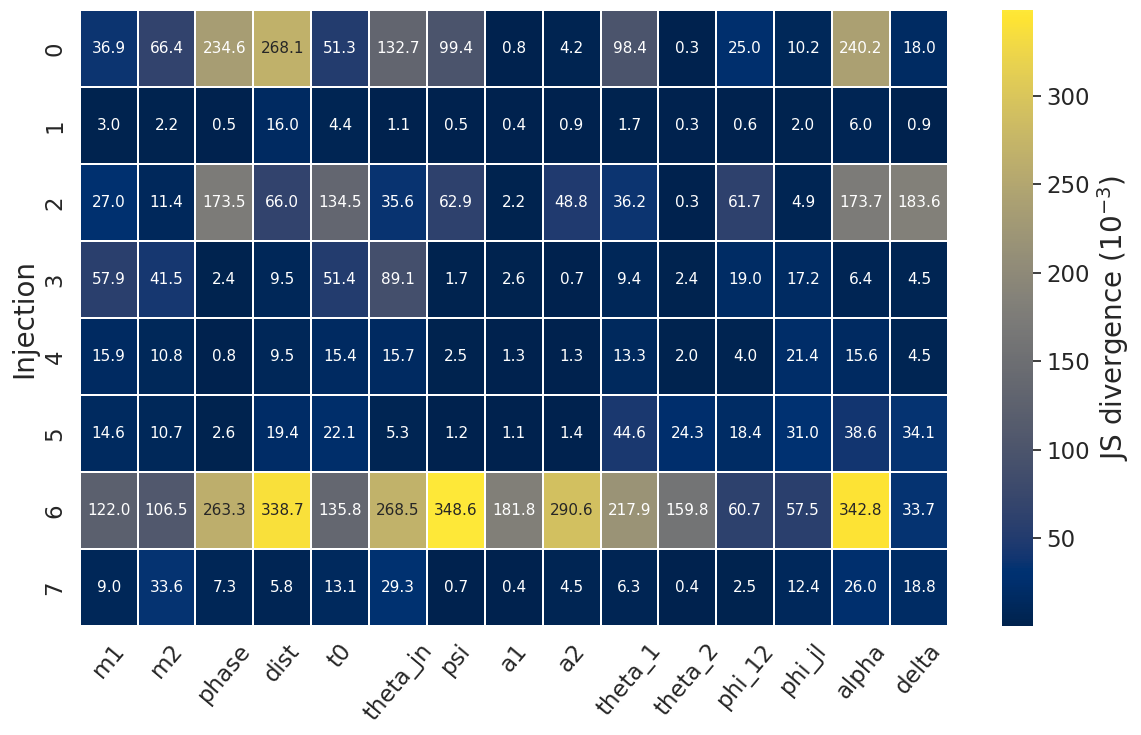

In [13]:
seaborn.set(font_scale=1.5)
fig, ax = plt.subplots(figsize = (14,8))
hm = seaborn.heatmap(par_vals*1e3, annot=True, fmt='0.1f', annot_kws = {"fontsize":11}, cmap="cividis", cbar_kws={'label': 'JS divergence ($10^{-3}$)'}, linewidths=0.05)
ax.set_xticks(np.arange(15) + 0.5,labels=labels, rotation=50)
ax.set_ylabel("Injection", fontsize=20)
ax.collections[0].colorbar.set_label('JS divergence ($10^{-3}$)', fontsize=20)
plt.show()

In [84]:
fig.savefig("./JS_div_grid.png")

In [28]:
np.shape(par_vals)

(50, 14)

(array([3., 4., 7., 5., 4., 4., 5., 5., 1., 1., 4., 2., 1., 0., 1., 0., 1.,
        1., 0., 1.]),
 array([0.00012558, 0.00017697, 0.00022837, 0.00027976, 0.00033115,
        0.00038254, 0.00043393, 0.00048532, 0.00053671, 0.0005881 ,
        0.0006395 , 0.00069089, 0.00074228, 0.00079367, 0.00084506,
        0.00089645, 0.00094784, 0.00099924, 0.00105063, 0.00110202,
        0.00115341]),
 <BarContainer object of 20 artists>)

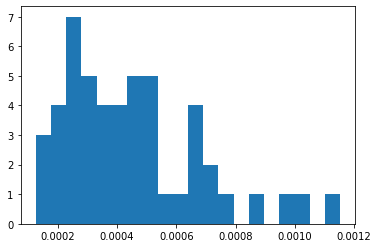

In [10]:
fig, ax = plt.subplots()
ax.hist(par_vals[:,10], bins = 20)
#ax.set_xscale("log")

In [105]:
root2 = "/home/joseph.bayley/public_html/CBC/vitamin_O4/BBH_1024Hz_1s_fullparam_polarisation/vitamin_c_basic_1024Hz_1s_256x128_128x164_32x32_16x16_4096_zdim15_ynorm32_notanh/comp_posterior"

In [106]:
epochs2, JS2, par_vals2, labels2 = get_JS_divs(root2)

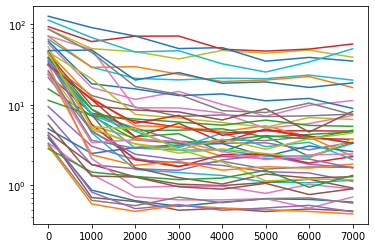

In [107]:
fig, ax = plt.subplots()
for i in range(len(JS2)):
    if len(JS2[i]) != len(epochs2):
        print(i)
        continue
    ax.plot(epochs2,np.sum(JS2[i], axis=1), label=i)
ax.set_yscale("log")
#ax.legend()

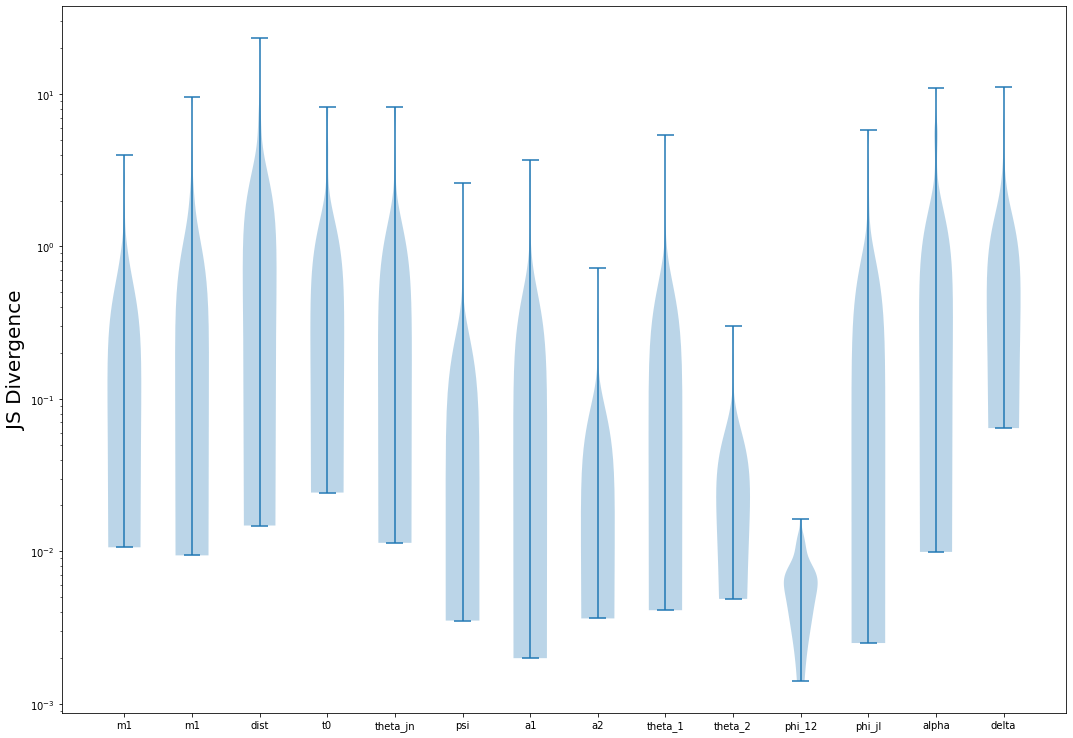

In [108]:
fig, ax = plt.subplots(figsize = (18,13))
pos = np.arange(14)
ax.violinplot(par_vals2, pos)
ax.set_xticks(pos)
ax.set_xticklabels(labels2)
ax.set_ylabel("JS Divergence", fontsize = 20)
ax.set_yscale("log")

## JS as a function of parameter

In [150]:
test_snrs

[]

In [32]:
sum_js = []
t_truth = []
t_snr = []
t_waveform = []
for i in range(len(JS)):
    sum_js.append(JS[i][-1])
    t_truth.append(test_truths[i].flatten())
    t_snr.append(test_snrs[i])
    t_waveform.append(test_waveforms[i])
t_truth = np.array(t_truth)
sum_js = np.array(sum_js)
t_snr = np.array(t_snr)

In [259]:
t_snr[-1]

array([21.02991277, 34.22986522])

In [153]:
np.shape(t_snr)

(50, 2)

In [125]:
np.shape(sum_js)

(50, 14)

In [33]:
label = ["mass ratio", "total mass", "distance", "t0", "phase", "theta_jn", "psi", "a1","a2","theta_1","theta_2","phi_12","phi_jl","alpha","delta"]

In [34]:
label2 = ["mass ratio", "total mass", "distance", "t0", "theta_jn", "psi", "a1","a2","theta_1","theta_2","phi_12","phi_jl","alpha","delta"]

(array([20., 16.,  4.,  3.,  2.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([  1.57962396,   8.75215529,  15.92468661,  23.09721793,
         30.26974926,  37.44228058,  44.6148119 ,  51.78734322,
         58.95987455,  66.13240587,  73.30493719,  80.47746851,
         87.64999984,  94.82253116, 101.99506248, 109.16759381,
        116.34012513, 123.51265645, 130.68518777, 137.8577191 ,
        145.03025042, 152.20278174, 159.37531307, 166.54784439,
        173.72037571, 180.89290703, 188.06543836, 195.23796968,
        202.410501  , 209.58303232, 216.75556365, 223.92809497,
        231.10062629, 238.27315762, 245.44568894, 252.61822026,
        259.79075158, 266.96328291, 274.13581423, 281.30834555,
        288.48087688]),
 <BarContainer object of 40 artists>)

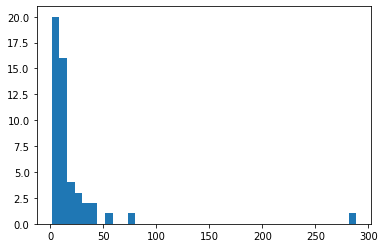

In [37]:
fig, ax = plt.subplots()
ax.hist(np.sqrt(np.sum(t_snr**2, axis=1)),bins = 40)

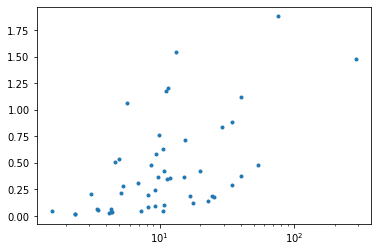

In [38]:
fig, ax = plt.subplots()
ax.plot((np.sqrt(np.sum(t_snr**2, axis=1))), np.sum(sum_js, axis = 1),".")
ax.set_xscale("log")

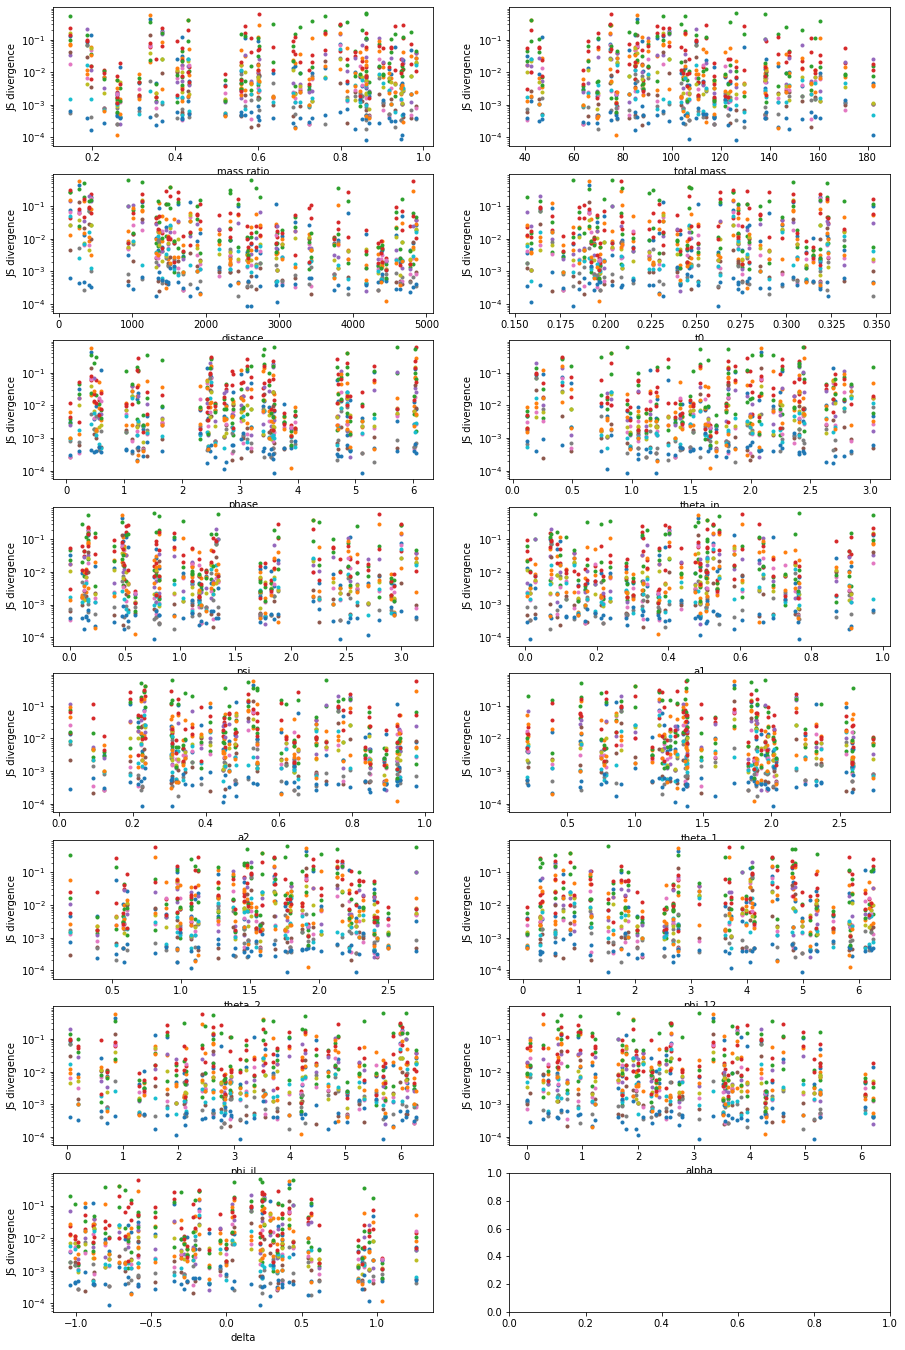

In [39]:
fig, ax = plt.subplots(nrows = 8, ncols = 2,figsize = (15,24))
axs = ax.flatten()

for i in range(len(t_truth[0])):
    if i == 0:
        truth = t_truth[:,1]/t_truth[:,0]
    elif i == 1:
        truth = t_truth[:,1] + t_truth[:,0]
    else:
        truth = t_truth[:,i]
        
    lowdistind = np.where(t_truth[:,2] < 1000)[0]
    #truth = t_truth[:,i] 
    for j in range(len(sum_js[0])):
        axs[i].plot(truth, sum_js[:,j],".")

    axs[i].set_yscale("log")
    axs[i].set_xlabel(label[i])
    axs[i].set_ylabel("JS divergence")

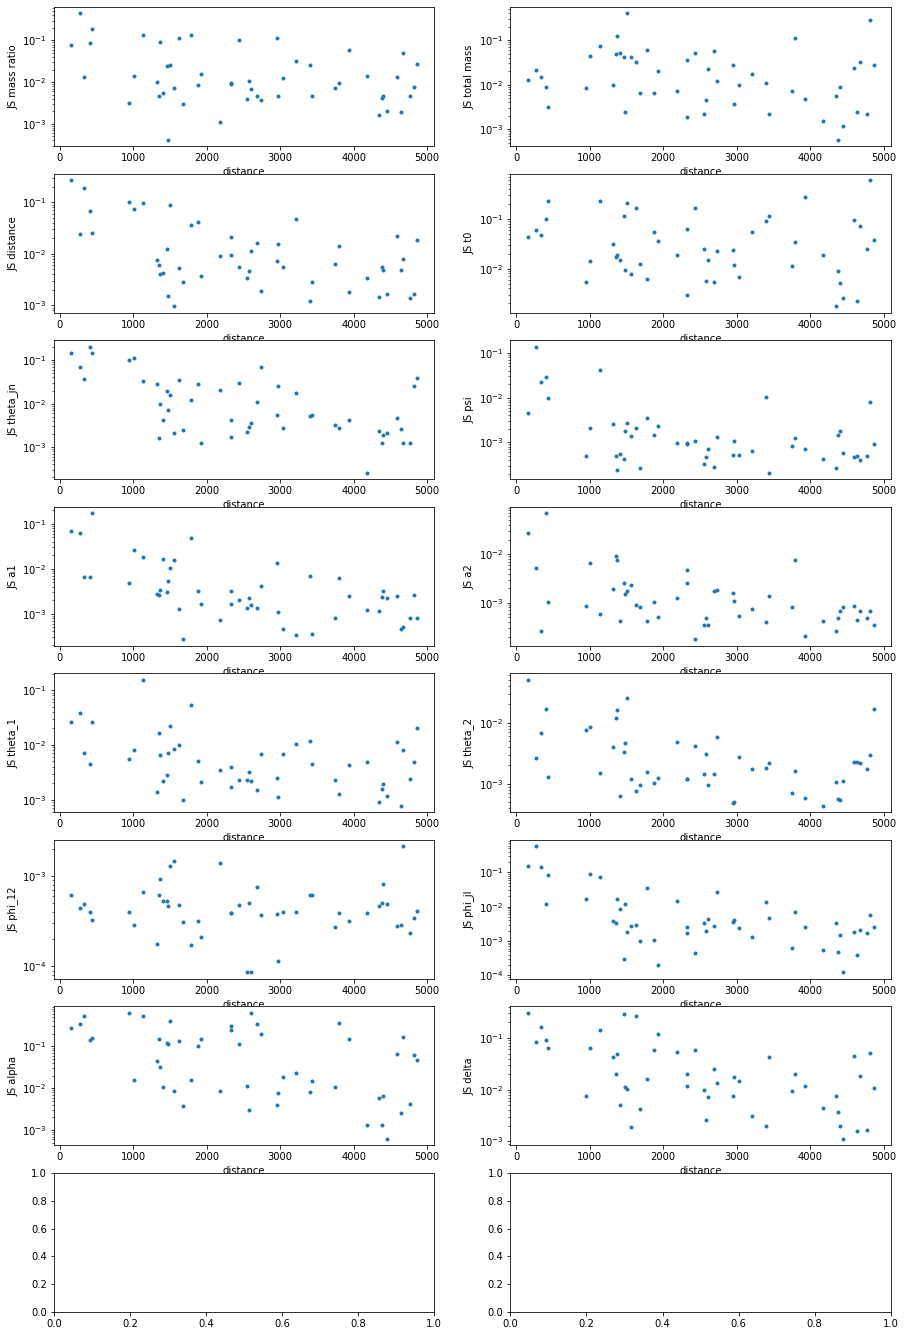

In [40]:
fig, ax = plt.subplots(nrows = 8, ncols = 2,figsize = (15,24))
axs = ax.flatten()

for j in range(len(sum_js[0])):
    truth = t_truth[:,2]
        
    lowdistind = np.where(t_truth[:,2] < 1000)[0]
    axs[j].plot(truth, sum_js[:,j],".")

    axs[j].set_yscale("log")
    axs[j].set_xlabel("distance")
    axs[j].set_ylabel("JS {}".format(label2[j]))

In [240]:
lowdist_ind = np.where(t_truth[:,2] < 1000)[0]

In [241]:
len(t_truth)

50

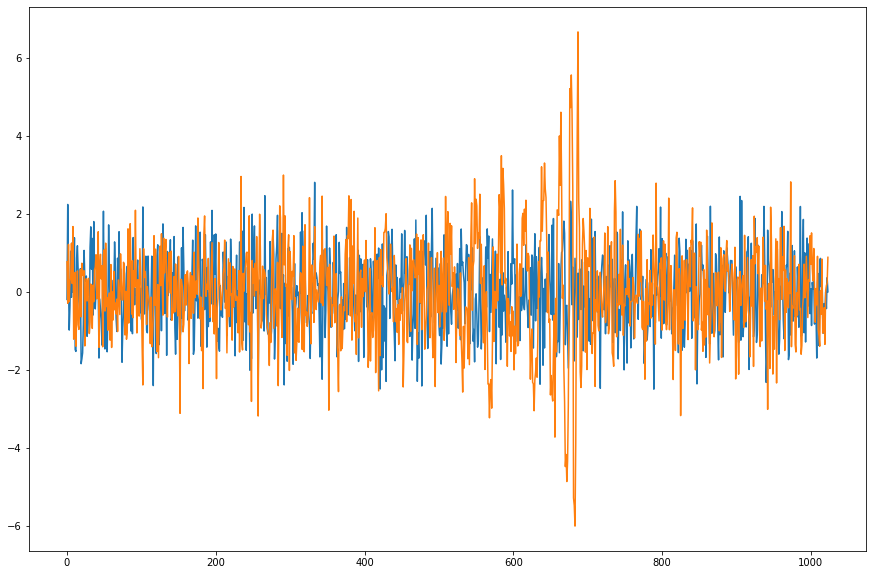

In [243]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(waveforms[lowdist_ind[4]].T)

# old parameter space
 - Mass - 35-85
 - Spin 0-0.8
 - dist 1000-3000

In [323]:
root_c = "/home/joseph.bayley/public_html/CBC/vitamin_O4/BBH_1024Hz_1s_chrisparamoriginal_polarisation/vitamin_c_basic_1024Hz_1s_96x64_96x32_96x32_96x16_96x16_96x16_4096_zdim15_ynorm32_notanh_correctdec_correctNt_newJS2/comp_posterior/"

In [324]:
epochs_c, JS_c, par_vals_c, labels_c = get_JS_divs(root_c, index = -1)

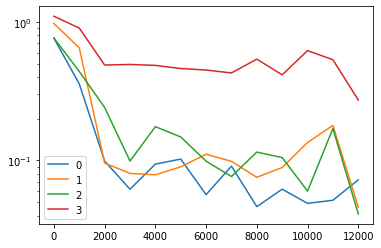

In [325]:
fig, ax = plt.subplots()
for i in range(len(JS_c)):
    ax.plot(epochs_c,np.sum(JS_c[i], axis=1), label=i)
ax.set_yscale("log")
ax.legend()

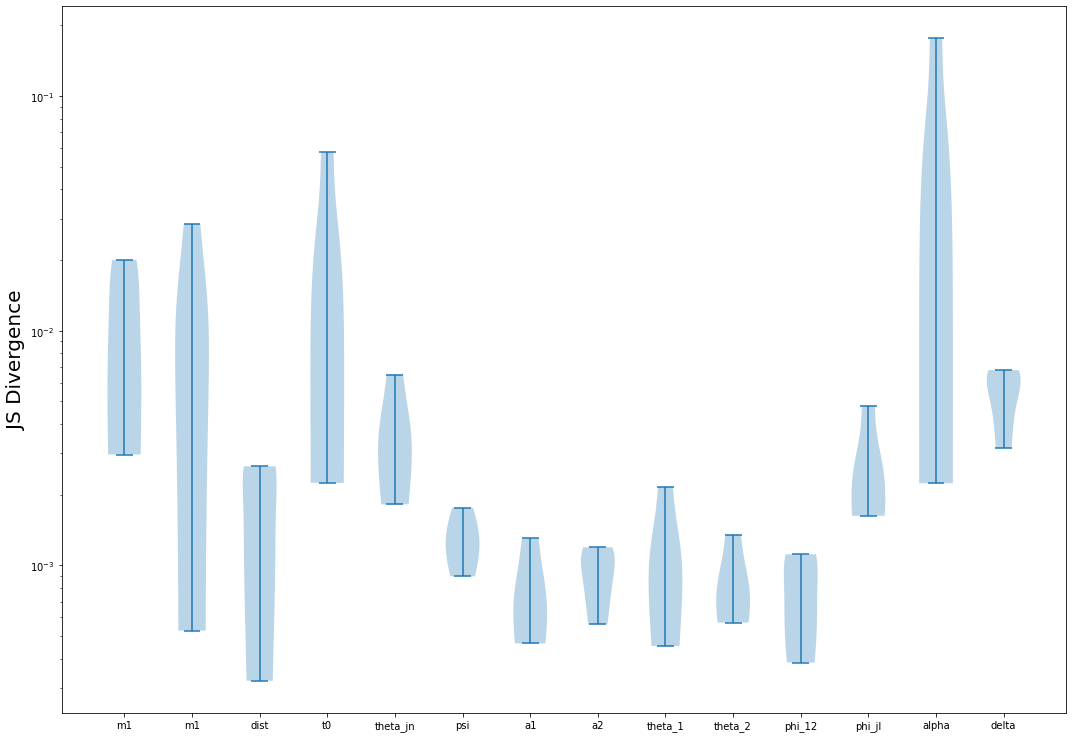

In [326]:
fig, ax = plt.subplots(figsize = (18,13))
pos = np.arange(14)
ax.violinplot(par_vals_c, pos)
ax.set_xticks(pos)
ax.set_xticklabels(labels_c)
ax.set_ylabel("JS Divergence", fontsize = 20)
ax.set_yscale("log")

In [14]:
root_c2 = "/home/joseph.bayley/public_html/CBC/vitamin_O4/BBH_1024Hz_1s_chrisparamoriginal_polarisation/vitamin_c_basic_1024Hz_1s_256x128_128x64_32x32_16x16_4096_zdim15_ynorm32/comp_posterior"

In [15]:
epochs_c2, JS_c2, par_vals_c2, labels_c2 = get_JS_divs(root_c2)

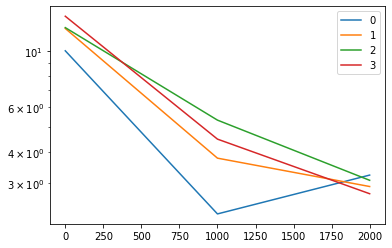

In [16]:
fig, ax = plt.subplots()
for i in range(len(JS_c2)):
    ax.plot(epochs_c2,np.sum(JS_c2[i], axis=1), label=i)
ax.set_yscale("log")
ax.legend()

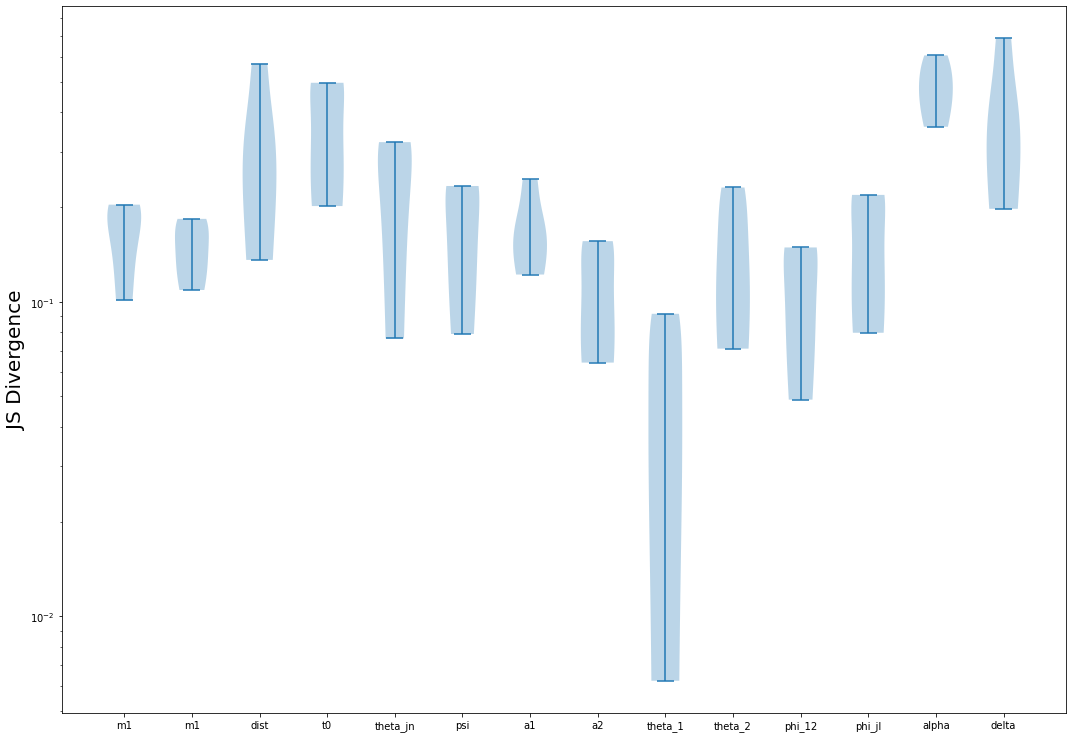

In [17]:
fig, ax = plt.subplots(figsize = (18,13))
pos = np.arange(14)
ax.violinplot(par_vals_c2, pos)
ax.set_xticks(pos)
ax.set_xticklabels(labels_c2)
ax.set_ylabel("JS Divergence", fontsize = 20)
ax.set_yscale("log")

In [71]:
import scipy.stats as st

In [86]:
gs1 = st.norm(loc = 0.0).rvs(8000)
gs2 = st.norm(loc = 0.0).rvs(8000)

In [87]:
kd1 = st.gaussian_kde(gs1)
kd2 = st.gaussian_kde(gs2)

In [88]:
1./(len(gs1))*np.sum(kd1(gs1)*np.log(kd1(gs1)/kd2(gs1))) + 1./(len(gs2))*np.sum(kd2(gs2)*np.log(kd2(gs2)/kd1(gs2)))

0.0009184476034459332